# Importing Libraries

In [0]:
import numpy as np
from PIL import Image

# Importing VGG16 ConvNet

In [2]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

Using TensorFlow backend.


# Instantiating our Classifier

In [3]:
classifier = VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 6s 0us/step


# Getting all the Layers

In [0]:
layers = dict([(layer.name, layer.output) for layer in classifier.layers])

In [5]:
layers

{'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(?, 112, 112, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(?, 56, 56, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool:0' shape=(?, 28, 28, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1/Relu:0' shape=(?, 28, 28, 512) dtype=float32>,
 'block4_co

In [6]:
classifier.count_params()

138357544

# Opening Image & Processing it

In [0]:
image_path = 'Art-292bf73d-4c12-49db-9f6d-179b15ec3b6b.jpg'
image = Image.open(image_path)
image = image.resize((224,224))

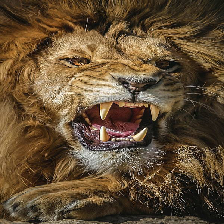

In [8]:
image

# Converting Image into an numpy array

In [0]:
x = np.asarray(image, dtype='float32')
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predicting results

In [10]:
preds = classifier.predict(x)
print('Predicted: ', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted:  [('n02129165', 'lion', 0.9961951), ('n02127052', 'lynx', 0.0017799305), ('n02130308', 'cheetah', 0.00080897874)]


# It's a Lion :D 